In [2]:
 # _*_ coding=utf-8 _*_ 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys, os
from math import log, ceil
import time
sys.path.append('./lib')
# from fountain_lib import soliton, robust_soliton

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

(128, 128)


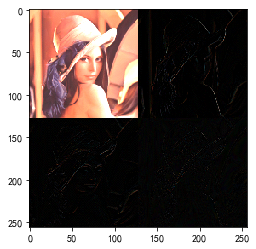

In [13]:
from  PIL import Image
import pywt
IMG = './doc/18.jpg'
IMG = './doc/whale_128.bmp'
IMG = './doc/lena.png'
img = Image.open(IMG)
width, heigh = img.size
mat = [np.empty((width, heigh)) for ii in range(3)]
for i in range(width):
    for j in range(heigh):
        (r, g, b)  = img.getpixel((i, j))
        mat[0][i, j] = r
        mat[1][i, j] = g
        mat[2][i, j] = b
coff = [pywt.dwt2(ii, 'haar', 'periodization') for ii in mat]
re_img = Image.new("RGB", (width, heigh), (0, 0, 20))
print(coff[0][0].shape)
for i in range(int(width / 2)):
    for j in range(int(heigh / 2)):
        R = np.int64(coff[0][0][i][j])
        G = np.int64(coff[1][0][i][j])
        B = np.int64(coff[2][0][i][j])        
        re_img.putpixel((i, j), (R, G, B))        

for i in range(int(width / 2)):
    for j in range(int(heigh / 2)):
        R = coff[0][1][0][i][j]
        G = coff[1][1][0][i][j]
        B = coff[2][1][0][i][j]
        re_img.putpixel((i+int(width/2), j), (int(R), int(G), int(B)))

for i in range(int(width / 2)):
    for j in range(int(heigh / 2)):
        R = coff[0][1][1][i][j]
        G = coff[1][1][1][i][j]
        B = coff[2][1][1][i][j]
        re_img.putpixel((i, j+int(heigh/2)), (int(R), int(G), int(B)))

for i in range(int(width / 2)):
    for j in range(int(heigh / 2)):
        R = coff[0][1][2][i][j]
        G = coff[1][1][2][i][j]
        B = coff[2][1][2][i][j]
        re_img.putpixel((i+int(width/2), j+int(heigh/2)), (int(R), int(G), int(B)))

img.save('./doc/lena.bmp')        
re_img.save('./doc/lena_dwt2.bmp')        
        
        
        
    
plt.imshow(re_img)
plt.show()
# del re_img        


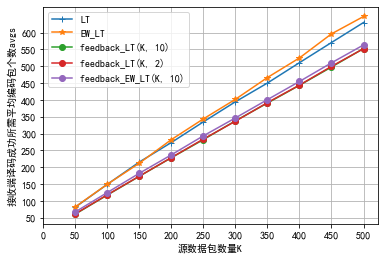

In [15]:
# K与接收完成所需平均编码包数avgs关系
df = pd.read_csv('./simulation/avgs_Wed_Dec__2_17_05_04_2020.csv')
K = df['K']
avgs = df['avgs']

df1 = pd.read_csv('./simulation/EW_avgs_Wed_Dec__2_16_38_56_2020.csv')
K1 = df1['K']
avgs1 = df1['avgs']

df2 = pd.read_csv('./simulation/feedback_avgs_Wed_Dec__2_18_01_45_2020.csv')
K2 = df2['K']
avgs2 = df2['avgs']

df3 = pd.read_csv('./simulation/feedback_avgs_Wed_Dec__2_19_45_35_2020.csv')
K3 = df3['K']
avgs3 = df3['avgs']

df4 = pd.read_csv('./simulation/feedback_EW_avgs_Fri_Dec__4_22_26_47_2020.csv')
K4 = df4['K']
avgs4 = df4['avgs']

# RSD(0.03, 0.05)
plt.plot(K, avgs, marker='+', label='LT')
plt.plot(K1, avgs1, marker='*', label='EW_LT')
plt.plot(K2, avgs2, marker='o', label='feedback_LT(K, 10)')
plt.plot(K3, avgs3, marker='o', label='feedback_LT(K, 2)')
plt.plot(K4, avgs4, marker='o', label='feedback_EW_LT(K, 10)')

plt.xticks(range(0, 500+50, 50))
plt.yticks(np.arange(50, 600+50, 50))
plt.xlabel('源数据包数量K')
plt.ylabel('接收端译码成功所需平均编码包个数avgs')
plt.legend()
plt.grid()
plt.savefig('./simulation/K-avgs' +time.asctime().replace(' ', '_').replace(':', '_') + '.pdf')

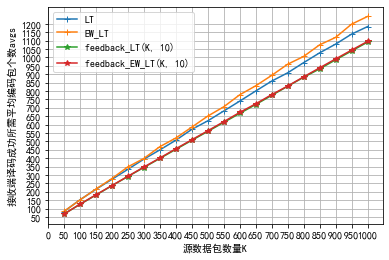

In [5]:
# K与接收完成所需平均编码包数avgs关系(K=[50,1000], 100次
df = pd.read_csv('./simulation/avgs_Sat_Dec__5_23_10_47_2020.csv')
K = df['K']
avgs = df['avgs']

df1 = pd.read_csv('./simulation/feedback_avgs_Sat_Dec__5_23_55_19_2020.csv')
K1 = df1['K']
avgs1 = df1['avgs']

df2 = pd.read_csv('./simulation/EW_avgs_Sun_Dec__6_17_15_55_2020.csv')
K2 = df2['K']
avgs2 = df2['avgs']

df3 = pd.read_csv('./simulation/feedback_EW_avgs_Sun_Dec__6_18_00_15_2020.csv')
K3 = df3['K']
avgs3 = df3['avgs']

# df4 = pd.read_csv('./simulation/feedback_EW_avgs_Fri_Dec__4_22_26_47_2020.csv')
# K4 = df4['K']
# avgs4 = df4['avgs']

# RSD(0.03, 0.05)
plt.plot(K, avgs, marker='+', label='LT')
plt.plot(K2, avgs2, marker='+', label='EW_LT')
plt.plot(K1, avgs1, marker='*', label='feedback_LT(K, 10)')
plt.plot(K3, avgs3, marker='*', label='feedback_EW_LT(K, 10)')
# plt.plot(K4, avgs4, marker='o', label='feedback_EW_LT(K, 10)')

plt.xticks(range(0, 1000+50, 50))
plt.yticks(np.arange(50, 1200+50, 50))
plt.xlabel('源数据包数量K')
plt.ylabel('接收端译码成功所需平均编码包个数avgs')
plt.legend()
plt.grid()
plt.savefig('./simulation/K-avgs' +time.asctime().replace(' ', '_').replace(':', '_') + '.pdf')

In [5]:
def all_at_once_solition(K):
    d = [ii + 1 for ii in range(K)]
    d_f = [1.0 if ii==1 else 0 for ii in d]
    while 1:
        yield np.random.choice(d, 1, False, d_f)[0]
all_at_once_solition(10)

<generator object all_at_once_solition at 0x000001BC8449A2B0>

In [ ]:
df = pd.read_csv('./simulation/sim_chunk_size/Thu_Mar_21_20_40_08_2019.csv')
PER = df1['PER']
df1 = df[df['code_rate'] < 5]
code_rate = [ii - 1 for ii in df1['code_rate']]
code_rate1 = [df1['code_rate'][ii] * (1 - PER[ii]) for ii in range(df1.shape[0])]
code_rate1 = [ii - 1 for ii in code_rate1]

plt.plot(df1['size'], code_rate,marker='+', label='BER=0.0001')
plt.plot(df1['size'], code_rate1, marker='*', label='BER=0')
# plt.plot(df1['size'], PER, marker='*', label='PER')
plt.xlabel('encoding chunk size')
plt.ylabel('decoding overhead')
plt.legend()
plt.grid()
plt.savefig('./simulation/sim_chunk_size/drop_vs_noDrop.pdf')
# plt.show()

In [6]:
K =100
k = range(1, K+1, 1)
N = 100000

def all_at_once_solition(K):
    d = [ii + 1 for ii in range(K)]
    d_f = [1.0 if ii==1 else 0 for ii in d]
    plt.plot(d, d_f, marker="*", label='度1分布')
    plt.xticks(range(0, K + 5, 5))
    plt.yticks(np.arange(0, 0.55, 0.05))

    plt.xlabel('度值d')
    plt.ylabel('probability')
    plt.legend()
    plt.grid()
    plt.savefig('./simulation/all_at_once.pdf')
    plt.show()    
   

def soliton(K):
    ''' 理想弧波函数 '''
    d = [ii + 1 for ii in range(K)]
    d_f = [1.0 / K if ii == 1 else 1.0 / (ii * (ii - 1)) for ii in d]
    plt.bar(d, d_f, label='理想弧波分布')
    plt.xticks(range(0, K + 5, 5))
    plt.yticks(np.arange(0, 0.55, 0.05))
    plt.xlabel('度值d')
    plt.ylabel('probability')
    plt.legend()
    plt.grid()
    plt.savefig('./simulation/soliton.pdf')
    plt.show()

def robust_soliton(K, c = 0.03, delta = 0.05):
    ''' 鲁棒理想弧波函数 '''
    d = [ii + 1 for ii in range(K)]
    soliton_d_f = [1.0 / K if ii == 1 else 1.0 / (ii * (ii - 1)) for ii in d]
    S = c * log(K / delta) * (K ** 0.5)
    print(S)
    interval_0 = [ii + 1 for ii in list(range(int(round(K / S)) - 1))]
    interval_1 = [int(round(K / S))]
    tau = [S / (K * dd) if dd in interval_0 
            else S / float(K) * log(S / delta) if dd in interval_1
            else 0 for dd in d]
    Z = sum([soliton_d_f[ii] + tau[ii] for ii in range(K)])
    u_d_f = [(soliton_d_f[ii] + tau[ii]) / Z for ii in range(K)]
    plt.bar(d, u_d_f, label='鲁棒孤波分布\nc=0.003, δ=0.005')
    plt.xticks(range(0, K + 5, 5))
    plt.yticks(np.arange(0, 0.45, 0.05))
    plt.xlabel('度值d')
    plt.ylabel('probability')
    plt.legend()
    plt.grid()
    plt.savefig('./simulation/robust_soliton.pdf')
    plt.show()

# c = 0.03, delta = 0.05
def plot_both(K, c, delta):
    ''' 鲁棒理想弧波函数 '''
    d = [ii + 1 for ii in range(K)]
    soliton_d_f = [1.0 / K if ii == 1 else 1.0 / (ii * (ii - 1)) for ii in d]
    S = c * log(K / delta) * (K ** 0.5)
    interval_0 = [ii + 1 for ii in list(range(int(round(K / S)) - 1))]
    interval_1 = [int(round(K / S))]
    tau = [S / (K * dd) if dd in interval_0 
            else S / float(K) * log(S / delta) if dd in interval_1
            else 0 for dd in d]
    Z = sum([soliton_d_f[ii] + tau[ii] for ii in range(K)])
    u_d_f = [(soliton_d_f[ii] + tau[ii]) / Z for ii in range(K)]
    
    
    d_f = [1.0 / K if ii == 1 else 1.0 / (ii * (ii - 1)) for ii in d]
    plt.plot(d, d_f, marker="*", label='理想孤波分布')
    
    plt.plot(d, u_d_f, marker="o", color = "r", label='鲁棒孤波分布\nc=0.003, δ=0.005')
    plt.xticks(range(0, K + 5, 5))
    plt.yticks(np.arange(0, 1.0, 0.5))

    plt.xlabel('度值d')
    plt.ylabel('probability')
    plt.legend()
    plt.grid()
    plt.savefig('./simulation/plot_both.pdf')
    plt.show()    

all_at_once_solition(100)
soliton(100)    
robust_soliton(100)
plot_both(100, 0.03, 0.05)
plot_both(100, 0.003, 0.005)
plot_both(100, 0.003, 0.5)
    

NameError: name 'plt' is not defined

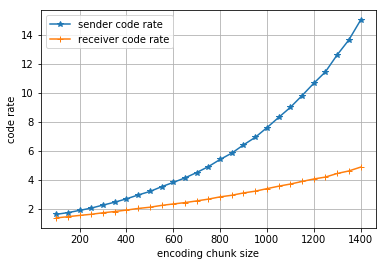

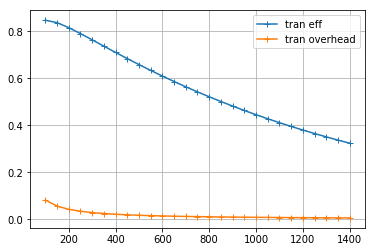

In [110]:
header = 9
net_overhead = [header * ii for ii in df1['drops_num']]
chunk_size = list(df1['size'])
size_all = [header + ii for ii in df1['size']]
size_d = df1['size']
drop_num = df1['drops_num']
PER = df1['PER']

decode_need = [df1['drops_num'][ii] * df1['size'][ii] / df1['code_rate'][ii] for ii in range(df1.shape[0])]

tran_send_all = [size_all[ii] * drop_num[ii] / (1 - PER[ii]) / decode_need[ii] for ii in range(df1.shape[0])]
tran_recv_net = [size_d[ii] *  drop_num[ii] /decode_need[ii] for ii in range(df1.shape[0])]

tran_eff = [tran_recv_net[ii] / tran_send_all[ii] for ii in range(df1.shape[0])]
tran_overhead = [header / float(chunk_size[ii] + header) for ii in range(df1.shape[0])]

plt.plot(chunk_size, tran_send_all, marker='*', label='sender code rate')
plt.plot(chunk_size, df1['code_rate'], marker='+', label='receiver code rate')
plt.xlabel('encoding chunk size')
plt.ylabel('code rate')
plt.legend()
plt.grid()
plt.savefig('./simulation/sim_chunk_size/network_overhead.pdf')
plt.show()

plt.plot(chunk_size, tran_eff, marker='+', label='tran eff')
plt.plot(chunk_size, tran_overhead, marker='+', label='tran overhead')
plt.legend()
plt.grid()
plt.show()

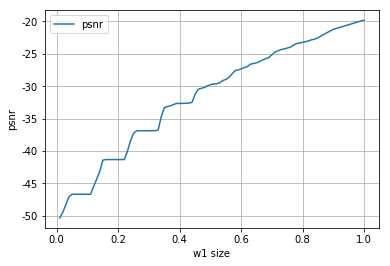

In [136]:
df_w1 = pd.read_csv('./simulation/sim_w1/res.csv')
df_w1 = df_w1[df_w1['psnr'] != 0]
size = df_w1['size']
psnr = df_w1['psnr']

plt.plot(list(size), list(psnr), label='psnr')
plt.legend()
plt.xlabel('w1 size')
plt.ylabel('psnr')
plt.grid()
plt.savefig('./simulation/sim_w1/psnr.pdf')
plt.show()

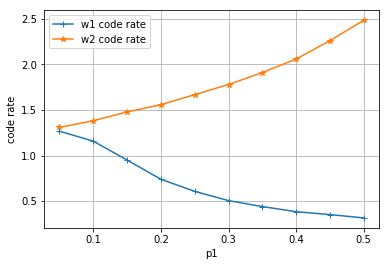

In [147]:
df_p1 = pd.read_csv('simulation/sim_p1/Sat_Mar_23_20_47_21_2019.csv')

w1 = list(df_p1['w1_done'])
w2 = list(df_p1['w2_done'])
p1 = list(df_p1['p1'])

plt.plot(p1, w1, marker='+', label='w1 code rate')
plt.plot(p1, w2, marker='*', label='w2 code rate')

plt.xlabel('p1')
plt.ylabel('code rate')
plt.grid()
plt.legend()
plt.savefig('./simulation/sim_p1/p1.pdf')
plt.show()


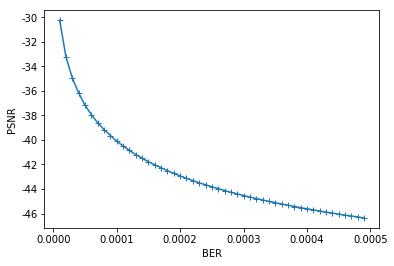

In [157]:
df_com = pd.read_csv('./simulation/sim_compare/compare.csv')
BER = df_com['BER']
psnr = df_com['psnr']

plt.plot(BER, psnr, marker='+', label='w1 code rate')
plt.xlabel('BER')
plt.ylabel('PSNR')
plt.show()

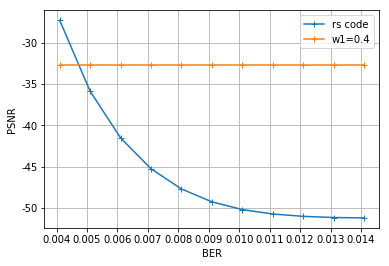

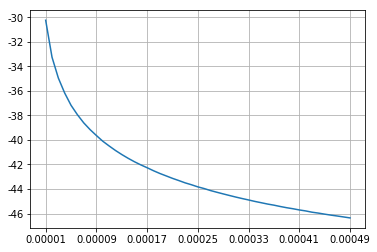

In [89]:
df_rs = pd.read_csv('./simulation/sim_rs/Mon_Mar_25_15_40_16_2019rs_compare.csv')
df_no_rs = pd.read_csv('./simulation/sim_compare/compare.csv')

df_rs = df_rs[df_rs['psnr'] < -20]
no_rs_psnr = df_no_rs['psnr']
rs_psnr = df_rs['psnr']
ber = df_rs['BER']

fou_psnr = [-32.67 for ii in ber]
plt.plot(ber, rs_psnr, marker="+", label="rs code")
plt.plot(ber, fou_psnr, marker="+", label="w1=0.4")
plt.xlabel("BER")
plt.ylabel("PSNR")
plt.legend()
plt.xticks(np.arange(0.004, 0.0142, 0.001))
plt.grid()
plt.savefig('./simulation/sim_rs/Mon_Mar_25_15_40_16_2019.pdf')
plt.show()

plt.plot(df_no_rs['BER'], no_rs_psnr)
plt.xticks(np.arange(0.00001, 0.0005, 0.00008))
plt.grid()

[0.0001, 0.0011, 0.0021, 0.0031, 0.0041, 0.0051, 0.0061, 0.0071, 0.0081, 0.0091, 0.0101, 0.0111, 0.0121, 0.0131, 0.0141]


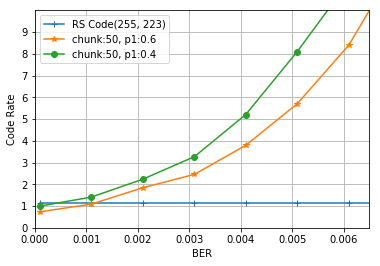

In [217]:
import numpy as np
ber = np.arange(0.0001, 0.015, 0.001)

df_50_6 = pd.read_csv('./simulation/sim_ber/Mon_Mar_25_17_03_33_2019_0.6.csv')
df_50_4 = pd.read_csv('./simulation/sim_ber/Mon_Mar_25_18_32_18_2019_0.4_50.csv')
df_75_4 = pd.read_csv('./simulation/sim_ber/Mon_Mar_25_22_11_25_2019_0.4_75.csv')


ber = df_50_6['ber']
code_rate0 = [255 / 223.0 for ii in ber]
code_rate1 = df_50_6['w1_done']
code_rate2 = df_50_4['w1_done']
code_rate3 = df_75_4['w1_done']

plt.plot(ber, code_rate0, marker="+", label="RS Code(255, 223)")
plt.plot(ber, code_rate1, marker="*", label="chunk:50, p1:0.6")
plt.plot(ber, code_rate2, marker="o", label="chunk:50, p1:0.4")
# plt.plot(ber, code_rate3, marker="^", label="chunk:50, p1:0.4")
print(list(ber))
plt.ylim(0, 10)
plt.xlim(0, 0.0065)
plt.yticks(np.arange(0,10,1))
plt.legend()
plt.grid()
plt.xlabel('BER')
plt.ylabel('Code Rate')
plt.savefig('./simulation/sim_ber/ber.pdf')
plt.show()